Script to look at what the semantic vector space distribution might look like

In [1]:
import os
import pandas as pd
import requests
import tarfile
import io
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.font_manager as fm


# For displaying Chinese characters properly
import matplotlib


In [10]:
df = pd.read_csv('../chinese_nouns_similar_words.csv')
df = df.sort_values(by="Similarity Score", ascending=False)

In [11]:
df.head()

,Original Noun,Similar Noun,Similarity Score
1100,中旬,下旬,0.947663
200,下旬,中旬,0.947662
201,下旬,上旬,0.947077
0,上午,下午,0.939259
1101,中旬,上旬,0.927038


In [12]:

# Set font path
font_path = '../SimHei.ttf'  # <- Change to actual path
my_font = fm.FontProperties(fname=font_path)


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

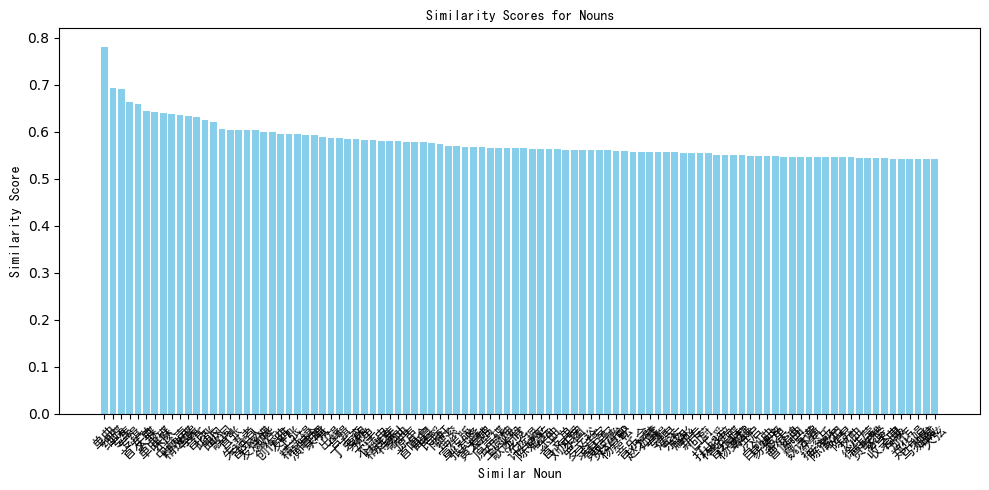

In [45]:


# Set a font that supports Chinese (try SimHei or Microsoft YaHei)
plt.rcParams['font.family'] = 'SimHei'  # or 'Microsoft YaHei'

# Avoid issues with minus signs
plt.rcParams['axes.unicode_minus'] = False


# Plot
plt.figure(figsize=(10, 5))
plt.bar(ren["Similar Noun"], ren["Similarity Score"], color='skyblue')
plt.xlabel("Similar Noun", fontproperties=my_font)
plt.ylabel("Similarity Score", fontproperties=my_font)
plt.title("Similarity Scores for Nouns", fontproperties=my_font)
plt.xticks(fontproperties=my_font, rotation=45)
plt.tight_layout()
plt.show()

In [48]:
ren["Normalized_Sim"] = (ren["Similarity Score"] - ren["Similarity Score"].min()) / (ren["Similarity Score"].max() - ren["Similarity Score"].min())

/var/folders/18/h0rqx0pj2dz58mn0_lqp_vrh0000gn/T/ipykernel_5748/1304876431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren["Normalized_Sim"] = (ren["Similarity Score"] - ren["Similarity Score"].min()) / (ren["Similarity Score"].max() - ren["Similarity Score"].min())


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


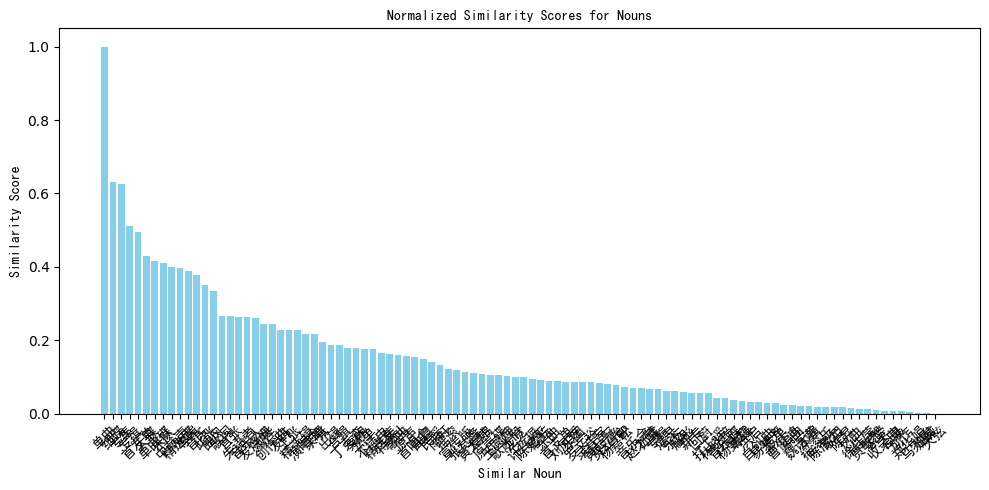

In [49]:

# Plot
plt.figure(figsize=(10, 5))
plt.bar(ren["Similar Noun"], ren["Normalized_Sim"], color='skyblue')
plt.xlabel("Similar Noun", fontproperties=my_font)
plt.ylabel("Similarity Score", fontproperties=my_font)
plt.title("Normalized Similarity Scores for Nouns", fontproperties=my_font)
plt.xticks(fontproperties=my_font, rotation=45)
plt.tight_layout()
plt.show()

In [30]:
ren["Similarity_Prob"] = ren["Similarity Score"] / ren["Similarity Score"].sum()


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


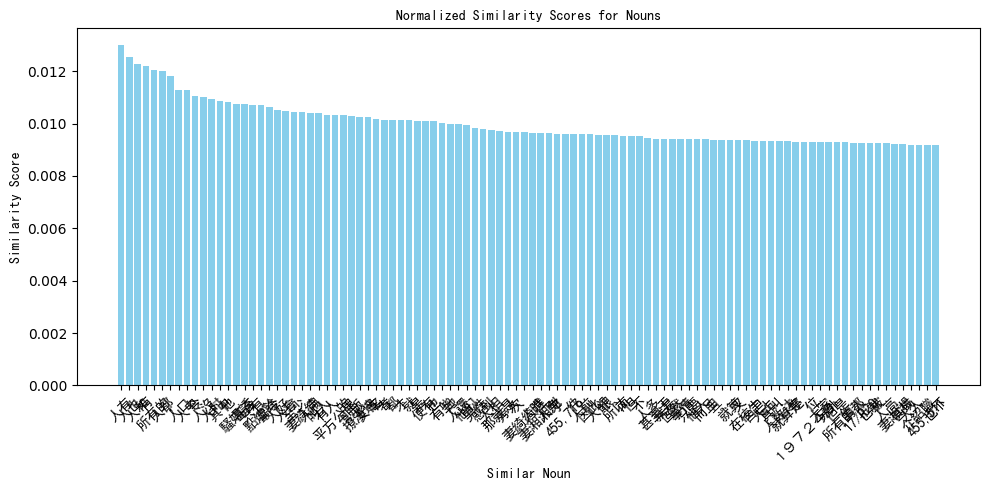

In [31]:

# Plot
plt.figure(figsize=(10, 5))
plt.bar(ren["Similar Noun"], ren["Similarity_Prob"], color='skyblue')
plt.xlabel("Similar Noun", fontproperties=my_font)
plt.ylabel("Similarity Score", fontproperties=my_font)
plt.title("Normalized Similarity Scores for Nouns", fontproperties=my_font)
plt.xticks(fontproperties=my_font, rotation=45)
plt.tight_layout()
plt.show()

In [50]:
ren["Normalized_Sim_avg"] = ren["Normalized_Sim"] / ren["Normalized_Sim"].sum()

/var/folders/18/h0rqx0pj2dz58mn0_lqp_vrh0000gn/T/ipykernel_5748/3658557881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ren["Normalized_Sim_avg"] = ren["Normalized_Sim"] / ren["Normalized_Sim"].sum()


findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.


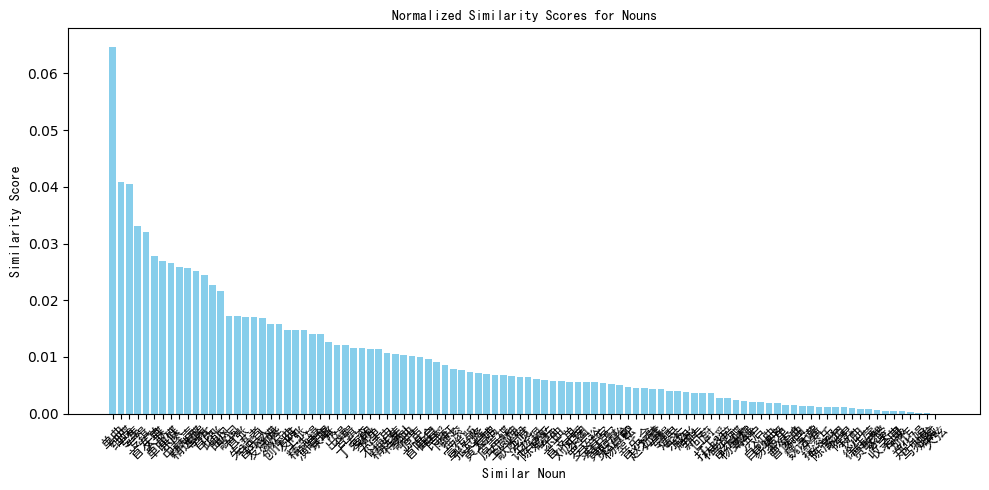

In [51]:

# Plot
plt.figure(figsize=(10, 5))
plt.bar(ren["Similar Noun"], ren["Normalized_Sim_avg"], color='skyblue')
plt.xlabel("Similar Noun", fontproperties=my_font)
plt.ylabel("Similarity Score", fontproperties=my_font)
plt.title("Normalized Similarity Scores for Nouns", fontproperties=my_font)
plt.xticks(fontproperties=my_font, rotation=45)
plt.tight_layout()
plt.show()

In [25]:
len(funv)

2706

In [32]:
mean_similarity = df["Similarity"].mean()
mean_similarity

np.float64(0.38081802287691974)

findfont: Font family 'SimHei' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family 'SimHei' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family 'SimHei' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family 'SimHei' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family 'SimHei' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family 'SimHei' not found.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Font family 'SimHei' not found.
findfont: Generi

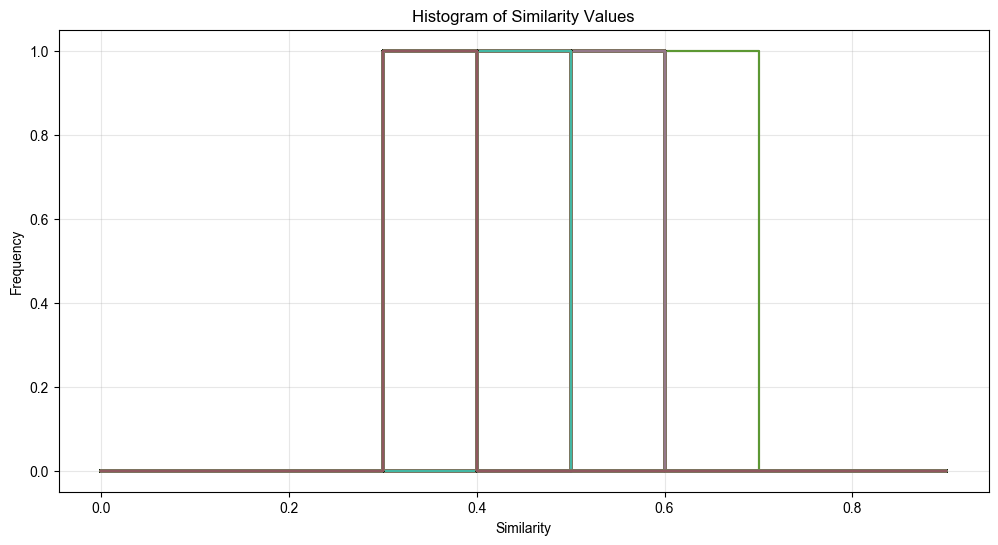

In [46]:
plt.figure(figsize=(12, 6))
unique_nouns = funv['Noun2'].unique()
bins = np.linspace(0, 1, 11)  # 10 bins between 0 and 1

# Process all data at once using numpy operations
for i, noun in enumerate(unique_nouns):
    # Get mask for this noun (faster than loc/iloc)
    mask = (funv['Noun2'].values == noun)
    
    # Extract values using the mask (very efficient)
    values = funv['Similarity'].values[mask]
    
    # Use numpy's histogram function (much faster than matplotlib's hist)
    counts, _ = np.histogram(values, bins=bins)
    
    # Plot using step function, with a color for each category (not labeled on x-axis)
    plt.step(bins[:-1], counts, where='post', label=f"Group {i+1}", alpha=0.7)
    # Note: Changed labels to "Group 1", "Group 2", etc. instead of actual Noun2 values

plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Similarity Values')
plt.grid(alpha=0.3)
plt.show()